# Qseries.m - A Mathematica Demo

This notebook serves as a demonstration and verification of the `Qseries.m` package, a Mathematica translation of Frank Garvan's original q-series Maple package.

The examples are taken directly from Garvan's tutorial paper, *"A q-PRODUCT TUTORIAL FOR A q-SERIES MAPLE PACKAGE"* (arXiv:math/9812092v1), and have been adapted for Mathematica syntax.

**Author of Mathematica Package:** Nikshay Chugh
<br>
**Date:** September 18, 2025

## 1. Installation and Setup

First, we need to load the `Qseries.m` package into our Mathematica kernel session. **Make sure this notebook and `Qseries.m` are in the same folder.**

In [235]:
Get["/home/nikshaychugh/IIScOneDrive/Projects/IISc/2024/Number Theory and Particle Physics/QSeries Package/Qseries.m"]

## 2. Basic Functions (Garvan, Section 2)

Let's test the basic functions for creating q-series.

### 2.1 Rising q-factorial `aqprod`

2        3        4        5        6        7        8        9        10
(1 - q) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q  )
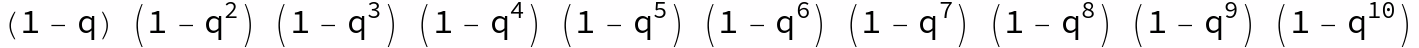

In [2]:
aqprod[q,q,10]

### 2.2 Gaussian Polynomials `qbin`

2    3    4    5
1 + q + q  + q  + q  + q
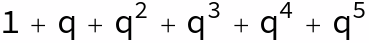

In [3]:
qbin[q, 5, 6]

2      3      4      5      6      7    8
(1 + q  + 2 q  + 2 q  + 4 q  + 6 q  + 4 q  + q ) 
 
                2      3      4      5      6      7    8
>   (1 + q + 2 q  + 3 q  + 5 q  + 7 q  + 7 q  + 4 q  + q )
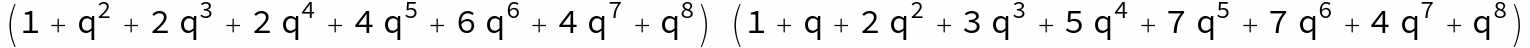

In [4]:
qbin[q^2 + q, 4,6]

### 2.3 Dedekind eta products `etaq`

2    5    7    12    15
1 - q - q  + q  + q  - q   - q
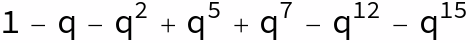

In [5]:
etaq[q, 1, 10]

### 2.4 Theta functions `theta`, `theta2`, `theta3`, `theta4`

25    16    9    4
    q     q     q    q    q          4  2    9  3    16  4    25  5
1 + --- + --- + -- + -- + - + q z + q  z  + q  z  + q   z  + q   z
     5     4     3    2   z
    z     z     z    z
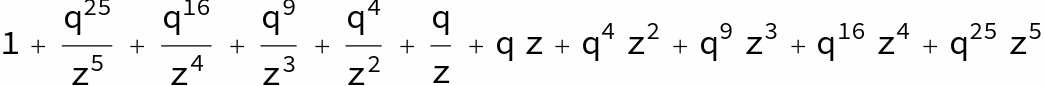

In [6]:
theta[z,q,5]

1/4         2      6      12      20      30    42
q    (2 + 2 q  + 2 q  + 2 q   + 2 q   + 2 q   + q  )
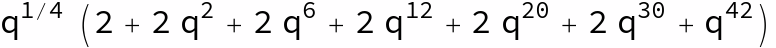

In [7]:
theta2[q,20]

4      9      16      25
1 + 2 q + 2 q  + 2 q  + 2 q   + 2 q
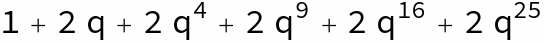

In [8]:
theta3[q,20]

4      9      16
1 - 2 q + 2 q  - 2 q  + 2 q
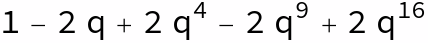

In [9]:
theta4[q,10]

## 3. Product Conversion (Garvan, Section 3)

### 3.1 `prodmake`

Let's test `prodmake` on the Rogers-Ramanujan identity.

In [10]:
x = Sum[q^n, {n,0,50}];

1
-----
1 - q
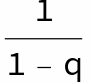

In [11]:
prodmake[x,q,10]

#### Exercise 1

3        4        5        7        9        11        13        15
1 / ((1 - q) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q  ) (1 - q  ) (1 - q  ) 
 
            16        17        19        21        23        24        25        27
>     (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) 
 
            29        31        33        35        36        37        39
>     (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ))
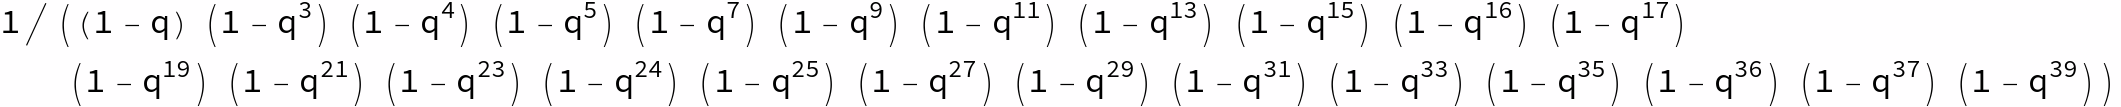

In [13]:
sum = Normal[Series[Sum[q^(n^2)/aqprod[q,q,2n], {n,0,10}],{q,0,100}]];
prodmake[sum,q,40]

4        6        9        11        14        16        19
1 / ((1 - q) (1 - q ) (1 - q ) (1 - q ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) 
 
            21        24        26        29        31        34        36        39
>     (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ))
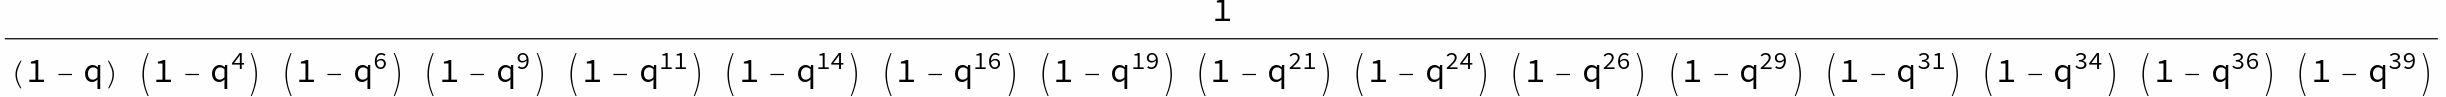

In [15]:
rrSeries = Normal[Series[Sum[q^(n^2)/aqprod[q, q, n], {n, 0, 8}], {q, 0, 50}]];
prodmake[rrSeries, q, 40]

### 3.2 `qfactor`

We define the recursive function `T(r, n)` as in the paper.

In [16]:
(* Define the base cases for the recursion *)
T[r_Integer, 0] := 1;
T[r_Integer, 1] := 0;

(* Define the recursive step with memoization *)
(* The definition T[r,n_] := T[r,n] = ... stores the result of the computation,
   so it doesn't need to be recomputed on subsequent calls with the same arguments. *)
T[r_Integer, n_Integer?Positive] := T[r, n] = 
  Expand[
    -Sum[
      qbin[q, k, r + 2*k] * T[r + 2*k, n - 2*k], 
      {k, 1, Floor[n/2]}
    ]
  ];

#### Exercise 2

In [22]:
ABMatrix = Table[qfactor[T[a,b], q, 20], {a,0,8}, {b,0,8}];
Print["qfactor[T[a,b]] for a,b = 0 to 8:"];
Do[
  Print["T[" <> ToString[a] <> "," <> ToString[b] <> "] = ", 
        ABMatrix[[a + 1, b + 1]]],
  {a, 0, 8}, {b, 0, 8}
]

qfactor[T[a,b]] for a,b = 0 to 8:
T[0,0] = 1
T[0,1] = 0
                2
           1 - q
T[0,2] = -(------)
           1 - q
T[0,3] = 0
                 4
         q (1 - q )
T[0,4] = ----------
                2
           1 - q
T[0,5] = 0
            3       6
           q  (1 - q )
T[0,6] = -(-----------)
                  3
             1 - q
T[0,7] = 0
          6       8
         q  (1 - q )
T[0,8] = -----------
                4
           1 - q
T[1,0] = 1
T[1,1] = 0
                3
           1 - q
T[1,2] = -(------)
           1 - q
T[1,3] = 0
                 5
         q (1 - q )
T[1,4] = ----------
           1 - q
T[1,5] = 0
            3       7
           q  (1 - q )
T[1,6] = -(-----------)
              1 - q
T[1,7] = 0
          6       9
         q  (1 - q )
T[1,8] = -----------
            1 - q
T[2,0] = 1
T[2,1] = 0
                4
           1 - q
T[2,2] = -(------)
           1 - q
T[2,3] = 0
                 3        6
         q (1 - q ) (1 - q )
T[2,4] = 

#### Dixson's Sum Example

6        7        8        9        10        11        12        13        14
((1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) (1 - q  ) 
 
            15             2       2 2       3 2       4 2       5 2
>     (1 - q  )) / ((1 - q)  (1 - q )  (1 - q )  (1 - q )  (1 - q ) )
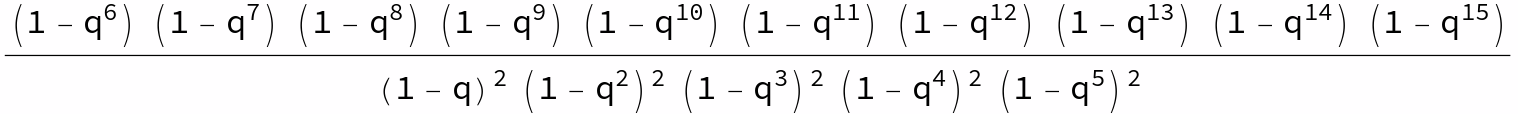

In [28]:
dixson[a_, b_, c_, q_] := Module[{x, k, y},
  x = 0;
  y = Min[a, b, c];
  Do[
    x = x + (-1)^k * q^(k*(3*k + 1)/2) * 
        qbin[q, c + k, b + c] * 
        qbin[q, a + k, c + a] * 
        qbin[q, b + k, a + b],
    {k, -y, y}
  ];
  x
]

(* Example usage: *)
dx = Expand[dixson[5, 5, 5, q]];
qfactor[dx,q, 20]

#### Exercise 3

In [29]:
funcn[a_, q_] := Module[{x, k},
  x = 0;
  Do[
    x += (-1)^k * q^(k*(3*k + 1)/2) * 
          qbin[q, a+k, 2*a]^3,
          {k, -a, a}
  ];
  x
];

(* Example usage: *)
func = Expand[funcn[5, q]];

In [32]:
ListOfValues = Table[funcn[n, q], {n, 0, 10}];

(* Convert to qfactor form *)
qfactors = Table[qfactor[ListOfValues[[n + 1]],q, 2*n^2], {n, 0, Length[ListOfValues] - 1}];
(*Print results*)
Do[
  Print["qfactor: ", qfactors[[n + 1]]],
  {n, 0, Length[ListOfValues] - 1}
];

qfactor: 1
                -2
qfactor: (1 - q)
               3        4        5        6
         (1 - q ) (1 - q ) (1 - q ) (1 - q )
qfactor: -----------------------------------
                        2       2 2
                 (1 - q)  (1 - q )
               4        5        6        7        8        9
         (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q )
qfactor: -----------------------------------------------------
                            2       2 2       3 2
                     (1 - q)  (1 - q )  (1 - q )
qfactor: 
 
           5        6        7        8        9        10        11        12
     (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q ) (1 - q  ) (1 - q  ) (1 - q  )
>    --------------------------------------------------------------------------
                              2       2 2       3 2       4 2
                       (1 - q)  (1 - q )  (1 - q )  (1 - q )
                6        7        8        9        10        11        12
qfactor: ((1

We have in the following 

$\text{QSeriesE}[q^k] = \prod_{n=1}^{\infty} (1-q^{kn})$

vs 

$\eta(k\tau) = q^{k/24} \prod_{n=1}^{\infty} (1-q^{kn})$

2      6      12      20      30      42      56      72      90      110
2 + 2 q  + 2 q  + 2 q   + 2 q   + 2 q   + 2 q   + 2 q   + 2 q   + 2 q   + 2 q    + 
 
       132    156
>   2 q    + q
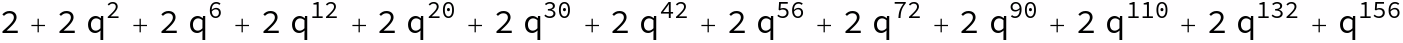

In [37]:
x = theta2[q, 100]/q^(1/4)

2
 2 η[4 τ]
-----------
 1/4
q    η[2 τ]
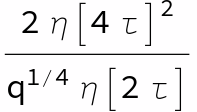

In [38]:
etamake[x, q, 100]

4 2
2 QSeriesE[q ]
---------------
           2
 QSeriesE[q ]
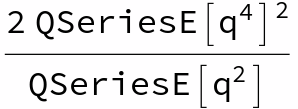

In [39]:
qetamake[x,q,100]

Here, the factor of $q^{1/4}$ goes away. The reason for this is:

$\left( 2\times \frac{4}{24} - 1 \times \frac{2}{24}\right) = \frac{1}{4}$

which cancels with the $q^{1/4}$ factor in the bottom.

4      9      16      25      36      49      64      81      100      121
1 + 2 q + 2 q  + 2 q  + 2 q   + 2 q   + 2 q   + 2 q   + 2 q   + 2 q   + 2 q    + 2 q
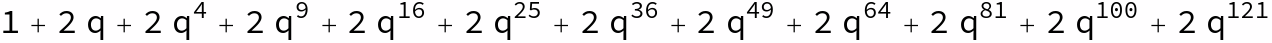

In [40]:
x = theta3[q,100]

5
   η[2 τ]
-------------
    2       2
η[τ]  η[4 τ]
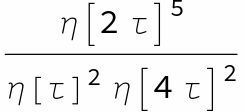

In [41]:
etamake[x, q, 100]

2 5
      QSeriesE[q ]
--------------------------
           2           4 2
QSeriesE[q]  QSeriesE[q ]
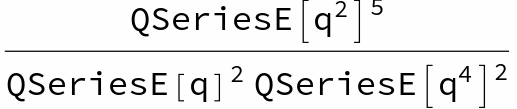

In [42]:
qetamake[x, q, 100]

The above two are equivalent because of a subtle reason.

$\left( 5 \times \frac{2}{24} - 2 \times \frac{1}{24} - 2 \times \frac{4}{24}\right) = 0$

Note that for the first case, the factor of $q^{k/24}$ is retained in the $\eta$ function representation but not in the QSeriesE function representation.


4      9      16      25      36      49      64      81      100      121
1 - 2 q + 2 q  - 2 q  + 2 q   - 2 q   + 2 q   - 2 q   + 2 q   - 2 q   + 2 q    - 2 q
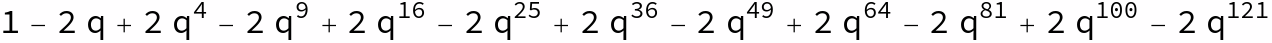

In [43]:
x = theta4[q, 100]

2
η[τ]
------
η[2 τ]
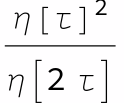

In [44]:
etamake[x, q, 100]

### 3.3 `mprodmake`

In [45]:
distinctPartsSeries = etaq[q, 2, 50] / etaq[q, 1, 50];

2        3        4        5        6        7        8        9
(1 + q) (1 + q ) (1 + q ) (1 + q ) (1 + q ) (1 + q ) (1 + q ) (1 + q ) (1 + q ) 
 
          10        11        12        13        14        15        16        17
>   (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) 
 
          18        19        20        21        22        23        24        25
>   (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) 
 
          26        27        28        29        30        31        32        33
>   (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) 
 
          34        35        36        37        38        39        40        41
>   (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) 
 
          42        43        44        45        46        47        48        49
>   (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) (1 + q  ) 
 
          50
>   (1 + q  )
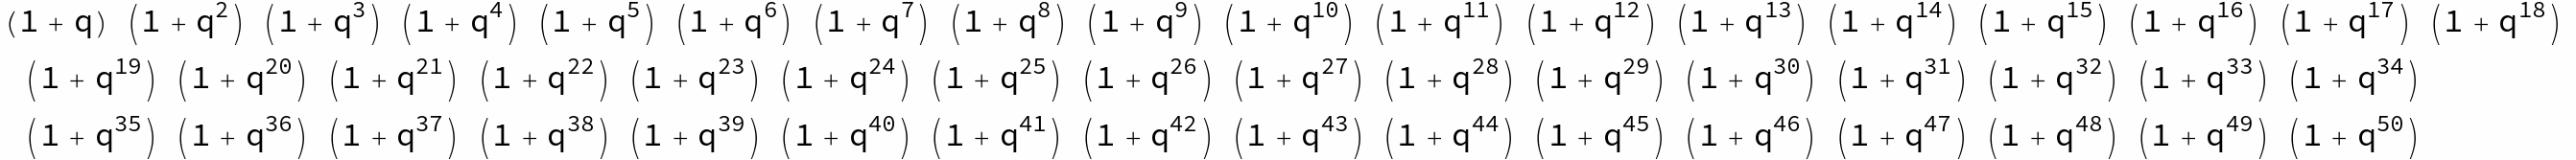

In [46]:
mprodmake[distinctPartsSeries, q, 50]

#### Exercise 4

Set::wrsym: Symbol C is Protected.

3      4       7      9
1 + 6 q + 6 q  + 6 q  + 12 q  + 6 q
   1/3      4/3      7/3      13/3      16/3      19/3      25/3      28/3
3 q    + 3 q    + 6 q    + 6 q     + 3 q     + 6 q     + 3 q     + 6 q
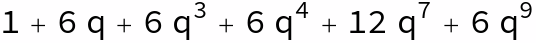
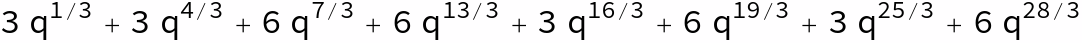

In [ ]:
a[q_, T_] := Module[{m, n},
  Normal @ Series[
    Sum[Sum[q^(m^2 + n*m + n^2), {m, -T, T}], {n, -T, T}],
    {q, 0, T}
  ]
];

A = a[q,10]

b[q_, T_] := Module[{m, n},
  Normal @ Series[
    Sum[Sum[Exp[2 Pi I / 3]^(n-m) q^(m^2 + n^2 + n*m), {m, -T, T}], {n, -T, T}],
    {q, 0, T} 
  ] 
];

B = b[q,10] //FullSimplify 

c[q_, T_] := Module[{m, n},
  Normal @ Series[
    Sum[Sum[q^((m+1/3)^2 + (n+1/3)*(m+1/3) + (n+1/3)^2), {m, -T, T}], {n, -T, T}],
    {q, 0, T}
  ]
];

D = c[q,10]

3      4      7      9       51
1 - 3 q + 6 q  - 3 q  - 6 q  + 6 q  + O[q]
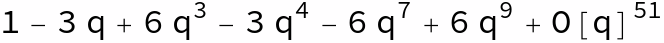

In [8]:
Series[B, {q, 0, 50}]

In [53]:
(* etamake[a, q, 10] *)

In [54]:
(* etamake[b, q, 10] *)

In [55]:
(* etamake[c, q, 10] *)

Exercise 4 does not work?!

### 3.4.1 `jacprodmake`

In [56]:
(* Step 1: Generate the Rogers-Ramanujan series *)
rrSeries = Sum[q^(n^2) / aqprod[q, q, n], {n, 0, 10}] + O[q]^41;

(* Step 2: Use jacprodmake to discover the symbolic form *)
jacExpr = jacprodmake[rrSeries, q, 40];
Print["Symbolic JAC form: ", jacExpr];

(* Step 3: Convert the symbolic form back to a q-product *)
prodExpr = jac2prod[jacExpr];
Print["Standard Product form: ", prodExpr];

(* Step 4: Verify that the result matches the original series *)
verification = Series[prodExpr - rrSeries, {q, 0, 40}];
Print["Verification Result (should be O[q]^41): ", verification];

                   JAC[0, 5, Infinity]
Symbolic JAC form: -------------------
                   JAC[1, 5, Infinity]
                                     1
Standard Product form: ------------------------------
                           5            4  5
                       (q;q )         (q ;q )
                             Infinity        Infinity
                                             41
Verification Result (should be O[q]^41): O[q]


#### Example

13/2
JAC[0, 14, Infinity]     / 
 
                         2
>   (JAC[1, 14, Infinity]  JAC[3, 14, Infinity] JAC[4, 14, Infinity] 
 
>     JAC[5, 14, Infinity] JAC[6, 14, Infinity] Sqrt[JAC[7, 14, Infinity]])
           14    28    70    98    168    210    308    364    490    560    714    798
Power[1 - q   - q   + q   + q   - q    - q    + q    + q    - q    - q    + q    + q   , 
 
                          7      28      63      112      175      252      343
>    13/2] / (Sqrt[1 - 2 q  + 2 q   - 2 q   + 2 q    - 2 q    + 2 q    - 2 q    + 
 
           448      567        6    8    26    30    60    66    108    116    170
>       2 q    - 2 q   ] (1 - q  - q  + q   + q   - q   - q   + q    + q    - q    - 
 
         180    246    258    336    350    440    456    558    576
>       q    + q    + q    - q    - q    + q    + q    - q    - q   ) 
 
            5    9    24    32    57    69    104    120    165    185    240    264
>     (1 - q  - q  + q   + q   - q   - q   + q    + q    - q    - q    + q    + q    - 
 
         329    357    432    464    549    585
>       q    - q    + q    + q    - q    - q   ) 
 
            4    10    22    34    54    72    100    124    160    190    234    270
>     (1 - q  - q   + q   + q   - q   - q   + q    + q    - q    - q    + q    + q    - 
 
         322    364    424    472    540    594
>       q    - q    + q    + q    - q    - q   ) 
 
            3    11    20    36    51    75    96    128    155    195    228    276
>     (1 - q  - q   + q   + q   - q   - q   + q   + q    - q    - q    + q    + q    - 
 
         315    371    416    480    531    603
>       q    - q    + q    + q    - q    - q   ) 
 
                     13    16    40    45    81    88    136    145    205    216
>     Power[1 - q - q   + q   + q   - q   - q   + q   + q    - q    - q    + q    + 
 
         288    301    385    400    496    513    621
>       q    - q    - q    + q    + q    - q    - q   , 2])
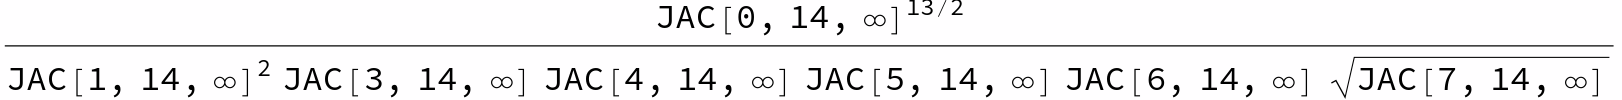
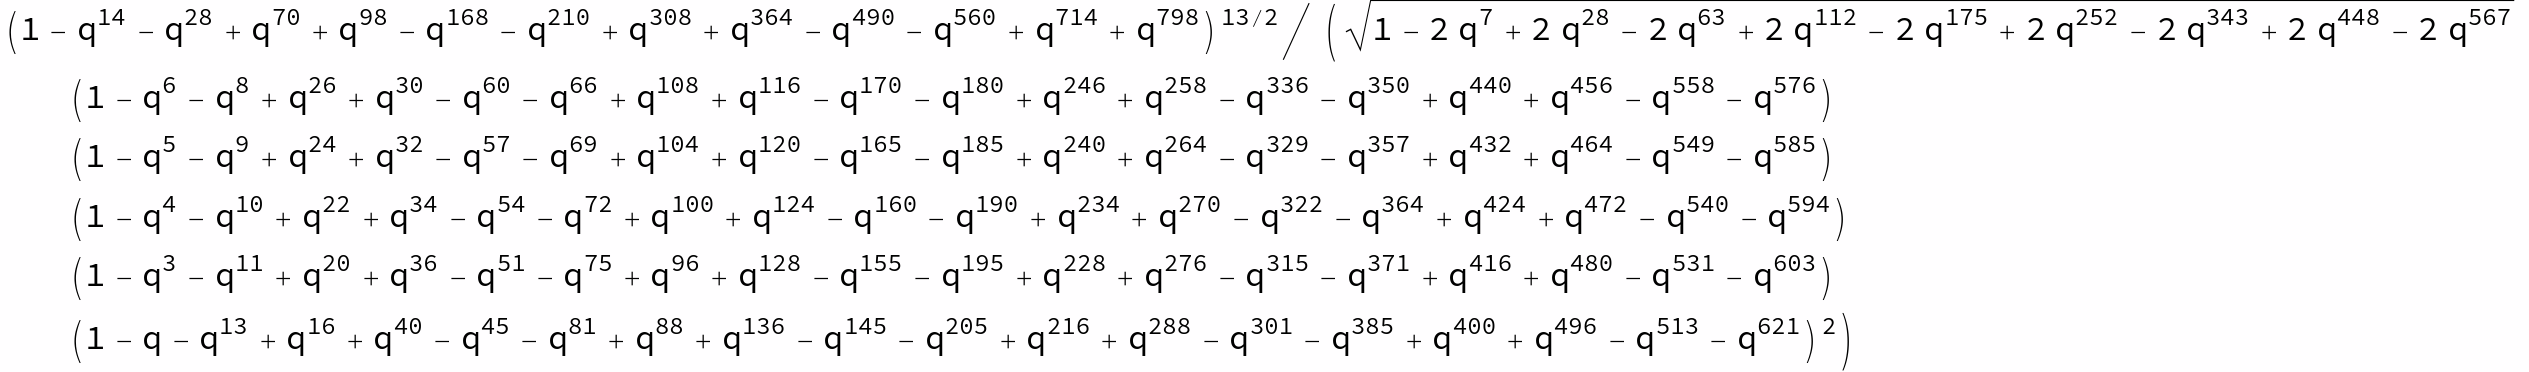

In [209]:
x = 0;
Do[
    x+= q^(n*(n+1)/2)*aqprod[-q,q,n]/aqprod[q,q,2*n+1],
    {n,0,10}
]
y = Normal[Series[x, {q,0,50}]];
z = jacprodmake[y, q, 50]
a = jac2series[z, q, 500]

#### Exercise 5

7/2
JAC[0, 10, Infinity]    / 
 
>   (JAC[1, 10, Infinity] JAC[2, 10, Infinity] JAC[3, 10, Infinity] 
 
>     Sqrt[JAC[5, 10, Infinity]])
      10    20    50    70    120    150    220    260    350    400    510    570 7/2
(1 - q   - q   + q   + q   - q    - q    + q    + q    - q    - q    + q    + q   )    / 
 
                 5      20      45      80      125      180      245      320
>   (Sqrt[1 - 2 q  + 2 q   - 2 q   + 2 q   - 2 q    + 2 q    - 2 q    + 2 q    - 
 
           405      500      605        3    7    16    24    39    51    72    88
>       2 q    + 2 q    - 2 q   ] (1 - q  - q  + q   + q   - q   - q   + q   + q   - 
 
         115    135    168    192    231    259    304    336    387    423    480
>       q    - q    + q    + q    - q    - q    + q    + q    - q    - q    + q    + 
 
         520    583    627        2    8    14    26    36    54    68    92    110
>       q    - q    - q   ) (1 - q  - q  + q   + q   - q   - q   + q   + q   - q    - 
 
         140    162    198    224    266    296    344    378    432    470    530
>       q    + q    + q    - q    - q    + q    + q    - q    - q    + q    + q    - 
 
         572    638            9    12    28    33    57    64    96    105    145
>       q    - q   ) (1 - q - q  + q   + q   - q   - q   + q   + q   - q    - q    + 
 
         156    204    217    273    288    352    369    441    460    540    561    649
>       q    + q    - q    - q    + q    + q    - q    - q    + q    + q    - q    - q
 
>       ))
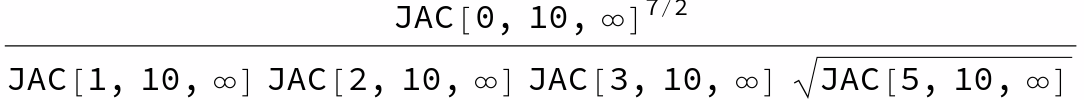
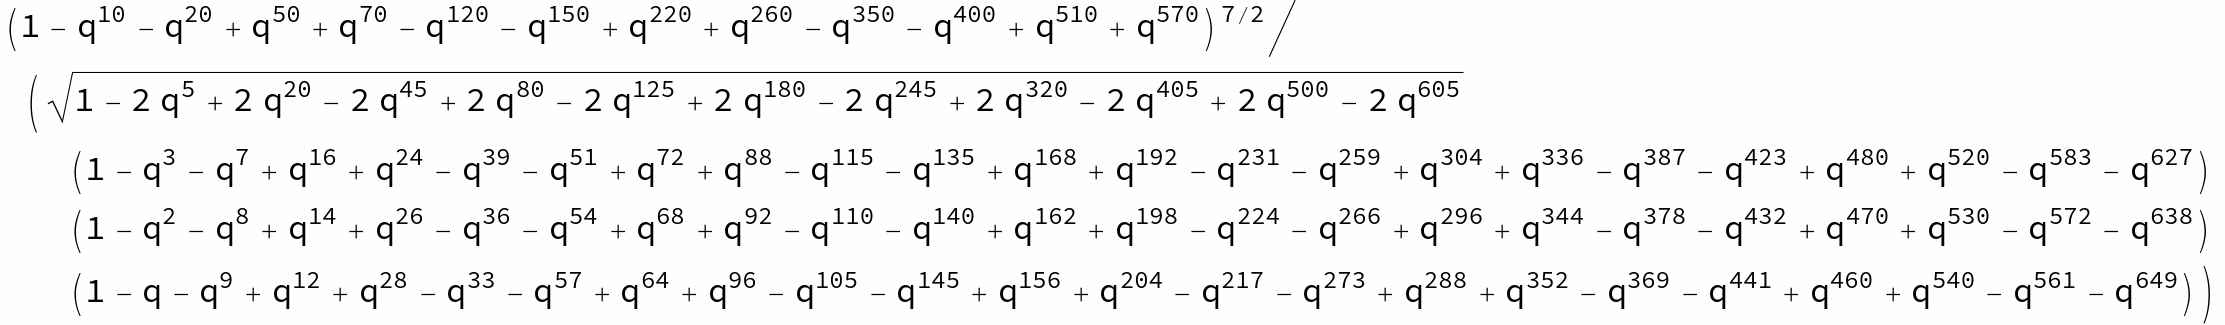

In [214]:
x = 0;
Do[
    x+= q^(n*(3n+1)/2)*aqprod[-q,q,n]/aqprod[q,q,2*n+1],
    {n,0,10}
]
y = Normal[Series[x, {q,0,50}]];
z = jacprodmake[y, q, 50]
a = jac2series[z, q, 500]

## 4. The Search for Relations (Garvan, Section 4)

### 4.1 `findhom`

Different homogeneous relations of degree = 1 among the given series:
Different homogeneous relations of degree = 2 among the given series:


{}
                 2      2       2         2
{X[1] X[2] - X[4] , X[1]  + X[2]  - 2 X[3] }
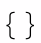
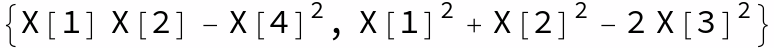

In [69]:
T = 50;
seriesList = {theta3[q, T], theta4[q, T], theta3[q^2, T], theta4[q^2, T]};
findhom[seriesList, q, 1]
findhom[seriesList, q, 2]

#### Exercise 6

In [221]:
(* T = 50;
seriesList = {a[q,T], b[q,T], c[q,T], a[q^3,T], b[q^3,T], c[q^3,T]};
findhom[seriesList, q, 1]
findhom[seriesList, q, 2]
findhom[seriesList, q, 3]
*)

(* Does not work because of fractional powers?! *)

### 4.2 `findhomcombo`

Number of series terms to check: 24
Different homogeneous combinations of degree = 2
 
>    between the given series and the target function:


2       2
{X[1]  - X[2] }
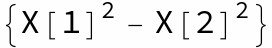

In [76]:
(* The function we want to create *)
target = Cos[2*q];

(* The building blocks we are allowed to use *)
basis = {Cos[q], Sin[q]};

(* Find the expression of degree 2 *)
findhomcombo[target, basis, q, 2]

Number of series terms to check: 27
Different non-homogeneous relations up to degree = 2 among the given series:


2       2
{-1 + X[1]  + X[2] }
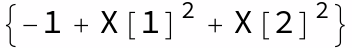

In [80]:
(* The building blocks we are working with *)
testfuncns = {Cos[q], Sin[q]};

(* Find all relations up to degree 2 *)
findnonhom[testfuncns, q, 2]

Number of series terms to check: 25
Possible non-homogeneous expressions up to degree = 3
 
>    between the given series and the target function:


3
{-3 X[1] + 4 X[1] }
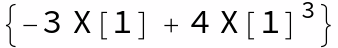

In [86]:
(* The function we want to express *)
target = Cos[3q];

(* Our only building block is Sin[q] *)
basis = {Cos[q]};

(* Find an expression up to degree 2 *)
findnonhomcombo[target, basis, q, 3]

Number of series terms to check: 23
Possible non-homogeneous expressions up to degree = 1
 
>    between the given series and the target function:


1   X[1]
{- - ----}
 2    2
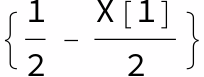

In [90]:
target = Sin[q]^2;
basis = {Cos[2*q]};

(* Find an expression up to degree 1, since Cos[2q] is to the first power *)
findnonhomcombo[target, basis, q, 1]

Number of series terms to check: 24
Possible non-homogeneous expressions up to degree = 1
 
>    between the given series and the target function:


X[1]   X[2]
{---- + ----}
  2      2
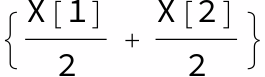

In [94]:
target = Cos[q] * Cos[2*q];
basis = {Cos[q], Cos[3*q]};

(* Use the homogeneous finder for a degree 1 combination *)
findnonhomcombo[target, basis, q, 1]

Number of series terms to check: 31
Different non-homogeneous relations up to degree = 3 among the given series:


3
   1                         2   X[2]
{-(-) X[1] + X[2] + X[1] X[2]  - -----}
   3                               3
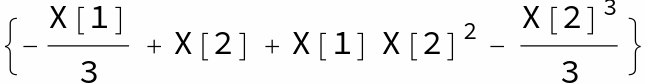

In [97]:
functionList = {Tan[3q], Tan[q]};

(* Find relations up to degree 2 *)
findnonhom[functionList, q, 3]


--- Running Simplified Verification Example ---
Dimensions: 25 monomials, 40 series terms.


4    4
-1 + X  + Y
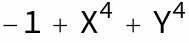

In [103]:
(*** --- 1. SIMPLIFIED FUNCTION DEFINITION --- ***)

findPolySimple[xSeries_, ySeries_, q_, maxDegreeX_Integer, maxDegreeY_Integer] := Module[
  {
    polyX, polyY, (* Safe, internal symbolic variables *)
    monomialBasis, numMonomials, numCoefficients, seriesOrder,
    expandedX, expandedY,
    coeffMatrix, kernel, polyRelation
  },
  
  (* Use safe, unique variables for the calculation *)
  polyX = Unique["polyX"]; 
  polyY = Unique["polyY"];
  
  monomialBasis = Flatten[Table[polyX^k polyY^j, {k, 0, maxDegreeX}, {j, 0, maxDegreeY}]];
  numMonomials = Length[monomialBasis];
  
  numCoefficients = numMonomials + 15;
  seriesOrder = numCoefficients + 2;
  Print["Dimensions: ", numMonomials, " monomials, ", numCoefficients, " series terms."];
  
  expandedX = Series[xSeries, {q, 0, seriesOrder}];
  expandedY = Series[ySeries, {q, 0, seriesOrder}];
  
  coeffMatrix = Table[
      monomialSeries = monomial /. {polyX -> expandedX, polyY -> expandedY};
      PadRight[CoefficientList[Normal[monomialSeries], q], numCoefficients],
      {monomial, monomialBasis}
  ];
  
  kernel = NullSpace[Transpose[coeffMatrix]];
  If[kernel === {}, Return["No polynomial relation found."]];
  
  polyRelation = First[kernel] . monomialBasis;
  
  (* Substitute with generic X and Y at the very end, expand, and return *)
  Return[Expand[polyRelation] /. {polyX -> X, polyY -> Y}];
];


(*** --- 2. VERIFICATION EXAMPLE --- ***)

Print["\n--- Running Simplified Verification Example ---"];

(* Call the function by passing the series expressions directly *)
findPolySimple[
  EllipticTheta[2, 0, q] / EllipticTheta[3, 0, q],
  EllipticTheta[4, 0, q] / EllipticTheta[3, 0, q],
  q, 4, 4
]

### There is some error in findpoly?!

2       3
  η[2 τ]  η[5 τ]
-------------------
 5/24     4
q     η[τ]  η[10 τ]
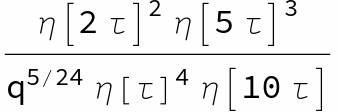

In [106]:
x = Series[etaq[q, 2, 100] / etaq[q, 1, 100], {q, 0, 100}];
y = sift[x, q, 5, 1, 199];
etamake[y, q, Length[y]-1]

21    15    10    6    3
    q     q     q     q    q    q          2    3  3    6  4    10  5    15  6
1 + --- - --- + --- - -- + -- - - - z + q z  - q  z  + q  z  - q   z  + q   z
     6     5     4     3    2   z
    z     z     z     z    z
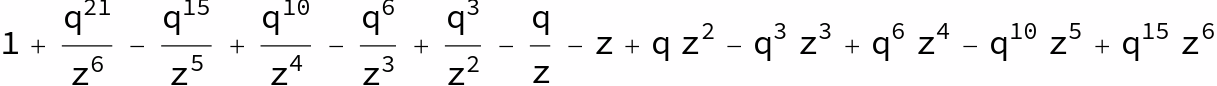

In [107]:
tripleprod[z,q,10]

2    5    7    12    15    22    26    35    40    51    57
1 - q - q  + q  + q  - q   - q   + q   + q   - q   - q   + q   + q
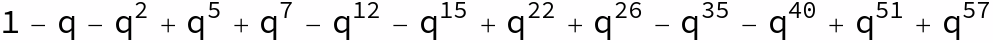

In [108]:
tripleprod[q,q^3,10]

n
                n - 1       q         n
Product[(1 - z q     ) (1 - --) (1 - q ), {n, 1, Infinity}] == 
                            z
 
            m  m  m (m - 1)/2
>   Sum[(-1)  z  q           , {m, -Infinity, Infinity}]
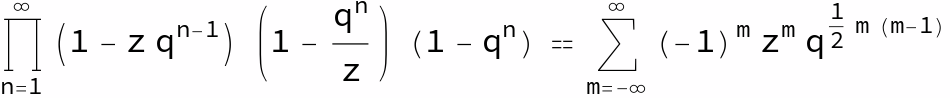

In [109]:
tripleprod[z,q,n,m,"seriesid"]

-2    3     2    -3    4     5   -5    6     7   -6    7
1 + z + q (-z   - z ) + q  (-z   - z ) + q  (z   + z ) + q  (z   + z )
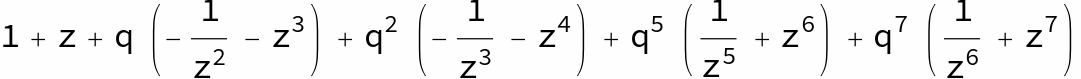

In [110]:
quinprod[z,q,4]

q   2             q                                2  2
(q;q)         (--;q )         (-(-);q)         (-z;q)         (q z ;q )         == 
     Infinity   2    Infinity    z    Infinity       Infinity          Infinity
               z
 
                      2
      3  3           q   3              3  3
>   (q ;q )         (--;q )         (q z ;q )         + 
           Infinity   3    Infinity          Infinity
                     z
 
          3  3           q   3            2  3  3
>    z ((q ;q )         (--;q )         (q  z ;q )        )
               Infinity   3    Infinity           Infinity
                         z
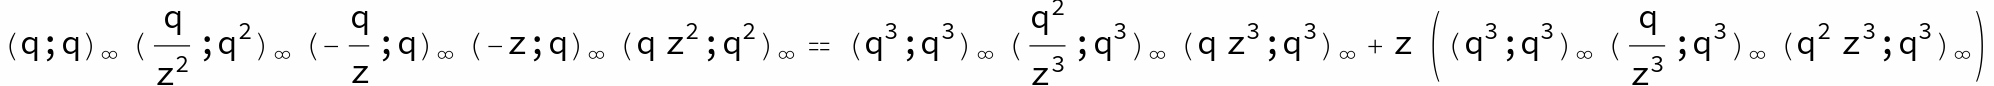

In [111]:
quinprod[z, q, "prodid"]

q   2             q                                2  2
(q;q)         (--;q )         (-(-);q)         (-z;q)         (q z ;q )         == 
     Infinity   2    Infinity    z    Infinity       Infinity          Infinity
               z
 
             -3 m       3 m + 1   m (3 m + 1)/2
>   Sum[((-z)     - (-z)       ) q             , {m, -Infinity, Infinity}]
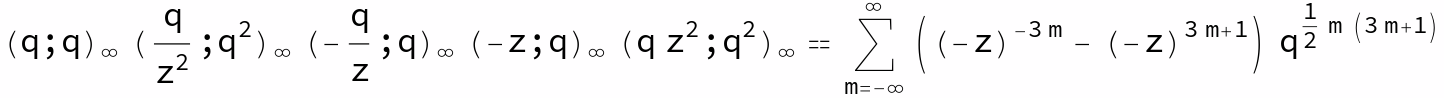

In [112]:
quinprod[z,q,m,"seriesid"]

3    7    8    14    20    29    31    42    52    66    69    85    99
1 + q - q  - q  - q  - q   + q   + q   + q   + q   - q   - q   - q   - q   + q
JAC[0, 5, Infinity] JAC[2, 5, Infinity]
---------------------------------------
          JAC[1, 5, Infinity]
  2  5            3  5            5  5
(q ;q )         (q ;q )         (q ;q )
       Infinity        Infinity        Infinity
-----------------------------------------------
            5            4  5
        (q;q )         (q ;q )
              Infinity        Infinity
         3    7    8    14    20    29    31    42    52    66    69    85    99
1 + q - q  - q  - q  - q   + q   + q   + q   + q   - q   - q   - q   - q   + q   + 
 
     118    122    143
>   q    + q    + q
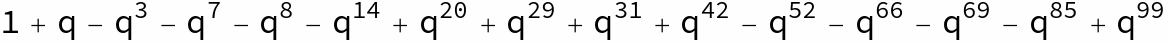
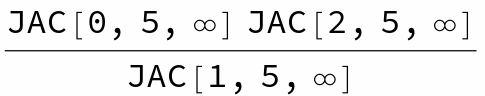
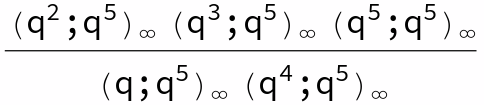
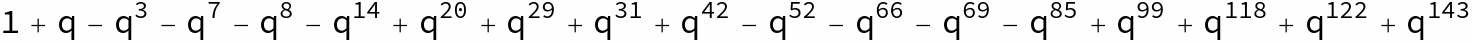

In [114]:
euler = etaq[q,1,500];
e0 = sift[euler,q,5,0,499]
x = jacprodmake[e0,q,50]
jac2prod[x]
quinprod[q,q^5, 20] //FullSimplify


--- Running Simplified Verification Example ---
Dimensions: 21 monomials, 36 series terms.


2      4         2
  1     9 X    3 X     6   Y
-(--) + ---- - ---- + X  + --
  16     16     2          16
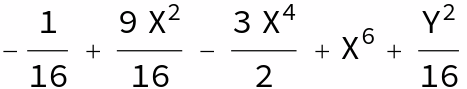

In [123]:
(*** --- 1. SIMPLIFIED FUNCTION DEFINITION --- ***)

findPolySimple[xSeries_, ySeries_, q_, maxDegreeX_Integer, maxDegreeY_Integer] := Module[
  {
    polyX, polyY, (* Safe, internal symbolic variables *)
    monomialBasis, numMonomials, numCoefficients, seriesOrder,
    expandedX, expandedY,
    coeffMatrix, kernel, polyRelation
  },
  
  (* Use safe, unique variables for the calculation *)
  polyX = Unique["polyX"]; 
  polyY = Unique["polyY"];
  
  monomialBasis = Flatten[Table[polyX^k polyY^j, {k, 0, maxDegreeX}, {j, 0, maxDegreeY}]];
  numMonomials = Length[monomialBasis];
  
  numCoefficients = numMonomials + 15;
  seriesOrder = numCoefficients + 2;
  Print["Dimensions: ", numMonomials, " monomials, ", numCoefficients, " series terms."];
  
  expandedX = Series[xSeries, {q, 0, seriesOrder}];
  expandedY = Series[ySeries, {q, 0, seriesOrder}];
  
  coeffMatrix = Table[
      monomialSeries = monomial /. {polyX -> expandedX, polyY -> expandedY};
      PadRight[CoefficientList[Normal[monomialSeries], q], numCoefficients],
      {monomial, monomialBasis}
  ];
  
  kernel = NullSpace[Transpose[coeffMatrix]];
  If[kernel === {}, Return["No polynomial relation found."]];
  
  polyRelation = First[kernel] . monomialBasis;
  
  (* Substitute with generic X and Y at the very end, expand, and return *)
  Return[Expand[polyRelation] /. {polyX -> X, polyY -> Y}];
];


(*** --- 2. VERIFICATION EXAMPLE --- ***)

Print["\n--- Running Simplified Verification Example ---"];

(* Call the function by passing the series expressions directly *)
findPolySimple[
  Cos[q],
  Sin[3q],
  q, 6, 2
]

In [124]:
(* findPolySimple[
    Normal[PowerExpand[Series[(3 etaq[q, 3, 100] )/((theta3[q,100]*theta3[q^3,100] + theta2[q,100]*theta2[q^3,100])*etaq[q,1,100]), {q,0,100}]]],
    Normal[PowerExpand[q*Series[(theta2[q,100]/theta2[q^3,100])^2 + (theta3[q,100]/theta3[q^3,100])^2, {q,0,100}]]],
    q,
    10,
    10
]
*)

Dimensions: 25 monomials, 40 series terms.


4    4
-1 + X  + Y
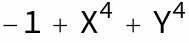

In [125]:
findPolySimple[
  EllipticTheta[2, 0, q] / EllipticTheta[3, 0, q],
  EllipticTheta[4, 0, q] / EllipticTheta[3, 0, q],
  q, 4, 4
]

In [129]:
(* Define the generating function for the partition numbers p(n) *)
pSeries = 1 / QPochhammer[q, q];

(* Search for congruences up to q^100, checking moduli up to Floor[Sqrt[100]]=10 *)
findcong[pSeries, 100]

Found congruences {remainder, modulus, prime_power}:


{{4, 5, 5}, {5, 7, 7}}

In [133]:
(* A series where a(n) = 6 if n is odd, and a(n) = 1 if n is even *)
testSeries1 = Sum[If[OddQ[n], 6, 1] q^n, {n, 0, 100}];

(* Search for congruences *)
findcong[testSeries1, 100, 10]

Found congruences {remainder, modulus, prime_power}:


{{1, 2, 2}, {1, 2, 3}}

In [137]:
(* A series where a(n) = 12 if n is of the form 3k+1, and 0 otherwise *)
testSeries2 = Sum[12 q^(3 k + 1), {k, 0, 40}];

(* Search for congruences *)
findcong[testSeries2, 120]

Found congruences {remainder, modulus, prime_power}:


{{0, 2, 3}, {0, 2, 4}, {0, 5, 3}, {0, 5, 4}, {0, 7, 3}, {0, 7, 4}, {1, 2, 3}, {1, 2, 4}, 
 
>   {1, 3, 3}, {1, 3, 4}, {1, 5, 3}, {1, 5, 4}, {1, 7, 3}, {1, 7, 4}, {2, 5, 3}, 
 
>   {2, 5, 4}, {2, 7, 3}, {2, 7, 4}, {3, 5, 3}, {3, 5, 4}, {3, 7, 3}, {3, 7, 4}, 
 
>   {4, 5, 3}, {4, 5, 4}, {4, 7, 3}, {4, 7, 4}, {5, 7, 3}, {5, 7, 4}, {6, 7, 3}, 
 
>   {6, 7, 4}}

In [141]:
(* Same series as before *)
testSeries2 = Sum[12 q^(3 k + 1), {k, 0, 40}];

(* Run the search again, but this time exclude results where the GCD is 12 *)
findcong[testSeries2, 120, Automatic, {12}]

Found congruences {remainder, modulus, prime_power}:


{}

In [145]:
(* The simple geometric series 1 + q + q^2 + ... *)
nullSeries = 1 / (1 - q);

(* Search for congruences *)
findcong[nullSeries, 100]

Found congruences {remainder, modulus, prime_power}:


{}

In [146]:
findhomcombomodp[targetSeries_, basisFunctions_List, p_Integer, q_, degree_Integer, topshift_Integer: 0, etaoption_String: "no"] := Module[
  {
    numBasisFuncs = Length[basisFunctions],
    polyVars, exponentVectors, monomialBasis,
    numMonomials, numCoefficients, seriesOrder,
    expandedBasis, expandedTarget,
    monomialSeriesList, coeffMatrix,
    kernel, relations = {}, etaRelations = {}
  },
  
  (* 1. Build the monomial basis robustly *)
  polyVars = Array[X, numBasisFuncs];
  exponentVectors = FrobeniusSolve[Table[1, numBasisFuncs], degree];
  monomialBasis = Inner[Power, polyVars, #, Times] & /@ exponentVectors;
  
  (* 2. Calculate series order and pre-compute all expansions *)
  numMonomials = Length[monomialBasis];
  numCoefficients = numMonomials + 20 + topshift;
  seriesOrder = numCoefficients + 1;
  Print["Number of series terms to check: ", seriesOrder];

  expandedBasis = Series[#, {q, 0, seriesOrder}] & /@ basisFunctions;
  expandedTarget = Series[targetSeries, {q, 0, seriesOrder}];
  
  (* 3. Build the series for each monomial combination *)
  monomialSeriesList = Table[
    Inner[Power, expandedBasis, exponents, Times],
    {exponents, exponentVectors}
  ];
  
  (* 4. Build the full coefficient matrix *)
  coeffMatrix = Join[
     Table[PadRight[CoefficientList[Normal[s], q], numCoefficients], {s, monomialSeriesList}],
     {PadRight[CoefficientList[Normal[expandedTarget], q], numCoefficients]}
  ];
  
  (* 5. Find the linear dependency modulo p *)
  kernel = NullSpace[Transpose[coeffMatrix], Modulus -> p];
  If[Length[kernel] > 1, Print["WARNING: dim ker = ", Length[kernel], ". Solution may not be unique."]];
  
  (* 6. Reconstruct the polynomial expression(s) from the kernel *)
  Do[
    With[{vec = k, lastCoeff = Last[k]},
      If[lastCoeff =!= 0,
        polyExpression = Drop[vec, -1] . monomialBasis;
        inv = PowerMod[lastCoeff, -1, p];
        AppendTo[relations, -polyExpression * inv];
        
        (* Optional eta-function transformation *)
        If[etaoption === "yes",
          etaExpression = Drop[vec, -1] . (etamake[Normal[#], q, seriesOrder - 2] & /@ monomialSeriesList);
          AppendTo[etaRelations, -etaExpression * inv];
        ]
      ]
    ],
    {k, kernel}
  ];
  
  Print["Homogeneous combinations of degree ", degree, " mod ", p, ":"];
  If[etaoption === "yes", Print[Mod[anseta, p]]];
  Return[Mod[relations, p]];
];

Number of series terms to check: 25
Homogeneous relations of degree 1 mod 5:


{Mod[X[1] + 2 X[3] + 2 X[4], 5], Mod[X[2] + 2 X[3] + 3 X[4], 5]}
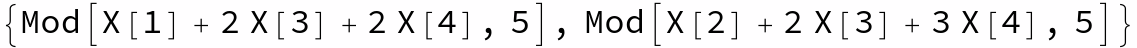

In [157]:
(* 1. Define some base series *)
f1 = Series[1 / (1 - q - q^2), {q, 0, 50}]; (* Fibonacci generating function *)
f2 = Series[QPochhammer[q, q], {q, 0, 50}];   (* Euler's function *)

(* 2. Create two more series that are linear combinations of the first two *)
f3 = f1 + f2;
f4 = f1 - f2;

(* 3. Define the full list of series to analyze *)
seriesSet = {f1, f2, f3, f4};

(* 4. Find homogeneous relations of degree 1, modulo 5 *)
(* We expect relations like 2*f1 - f3 - f4 = 0 and 2*f2 - f3 + f4 = 0 *)
findhommodp[seriesSet, 5, q, 1]

In [165]:
(* 1. Define two basis series using Ramanujan's Theta functions *)
f1 = Series[RamanujanTheta[q], {q, 0, 50}];
f2 = Series[RamanujanTheta[q^2], {q, 0, 50}];
basis = {f1, f2};

(* 2. Define a target series as a known quadratic combination *)
target = f1^2 + 3*f1*f2 - f2^2;

(* 3. Find the combination of degree 2, modulo 7 *)
findhomcombomodp[target, basis, 7, q, 2]

Number of series terms to check: 24


NullSpace::lanmod: Nonzero modulus may be specified only for integer or rational matrices, or for matrices of univariate rational functions with rational number coefficients. In the latter case, the modulus needs to be a machine-sized prime number.

Do::iterb: Iterator {k, kernel$61120} does not have appropriate bounds.

Homogeneous combinations of degree 2 mod 7:


{}

Number of series terms to check: 24
Found linear combinations:


E6
{2 E2 - 3 E4 + --}
               2
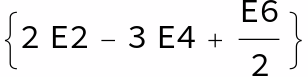

In [176]:
(* 1. Define the first three Eisenstein series. Need the Q-series definitions. *)
EisensteinE2[q_, n_] := Series[1 - 24 Sum[DivisorSigma[1, k] q^k, {k, 1, n}], {q, 0, n}];
EisensteinE4[q_, n_] := Series[1 + 240 Sum[DivisorSigma[3, k] q^k, {k, 1, n}], {q, 0, n}];
EisensteinE6[q_, n_] := Series[1 - 504 Sum[DivisorSigma[5, k] q^k, {k, 1, n}], {q, 0, n}];

(* 2. Create a list of basis functions and a corresponding list of symbols *)
basisFuncs = {EisensteinE2[q, 40], EisensteinE4[q, 40], EisensteinE6[q, 40]};
basisSyms = {E2, E4, E6};

(* 3. Define a target function as a linear combination with rational coefficients *)
targetFunc = 2*basisFuncs[[1]] - 3*basisFuncs[[2]] + (1/2)*basisFuncs[[3]];

(* 4. Find the linear combination *)
findlincombo[targetFunc, basisFuncs, basisSyms, q]

Number of series terms to check: 24
Found linear combinations mod 11:


{Mod[-9 E2 - 7 E4 - E6, 11]}
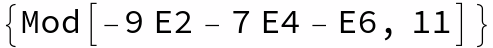

In [187]:
(* 1. Use the same Eisenstein series definitions from the previous example *)
EisensteinE2[q_, n_] := Series[1 - 24 Sum[DivisorSigma[1, k] q^k, {k, 1, n}], {q, 0, n}];
EisensteinE4[q_, n_] := Series[1 + 240 Sum[DivisorSigma[3, k] q^k, {k, 1, n}], {q, 0, n}];
EisensteinE6[q_, n_] := Series[1 - 504 Sum[DivisorSigma[5, k] q^k, {k, 1, n}], {q, 0, n}];

(* 2. Create basis functions and symbols *)
basisFuncs = {EisensteinE2[q, 40], EisensteinE4[q, 40], EisensteinE6[q, 40]};
basisSyms = {E2, E4, E6};

(* 3. Define a target function as a simple integer linear combination *)
targetFunc = 2*basisFuncs[[1]] + 4*basisFuncs[[2]] - 1*basisFuncs[[3]];

(* 4. Find the linear combination modulo the prime p=11 *)
findlincombomodp[targetFunc, basisFuncs, basisSyms, 11, q]